In [110]:
import tensorflow as tf

In [111]:
import numpy as np
import os
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [112]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [113]:
iris = load_iris()
X = iris.data[:, (2, 3)] 
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/tmp/ipykernel_20386/1218911015.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [114]:
y_pred

array([1])

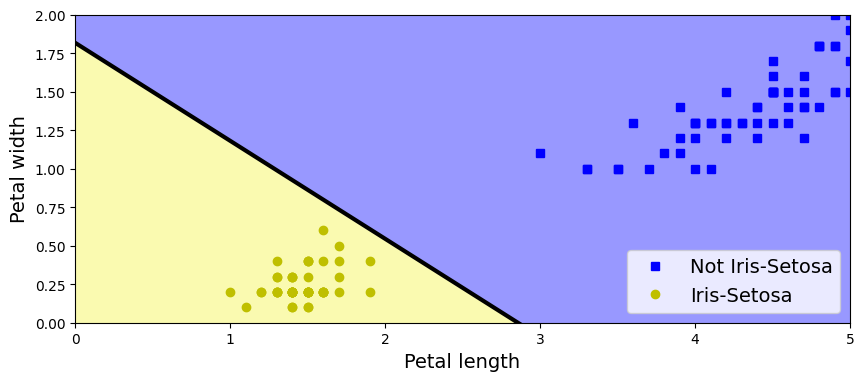

In [115]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

# Activation functions

In [116]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

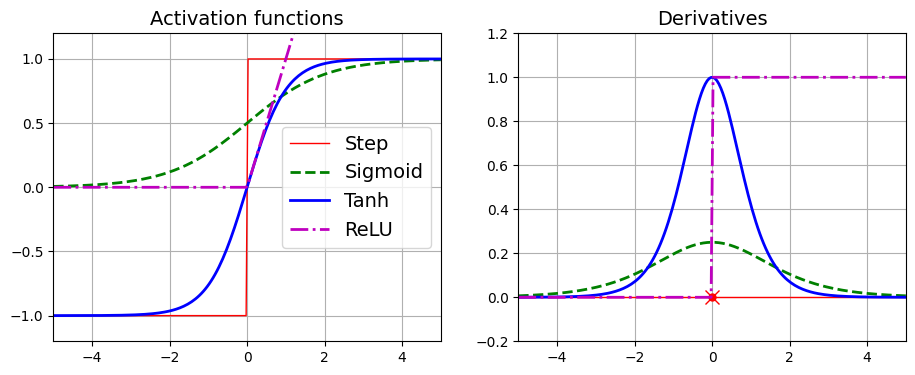

In [117]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

In [118]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

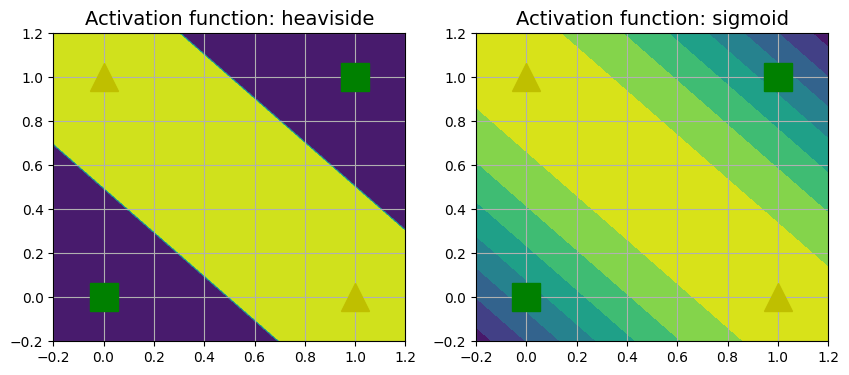

In [119]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [120]:
import tensorflow as tf
from tensorflow import keras

In [121]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [122]:
X_train_full.shape

(60000, 28, 28)

In [123]:
X_train_full.dtype

dtype('uint8')

In [124]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

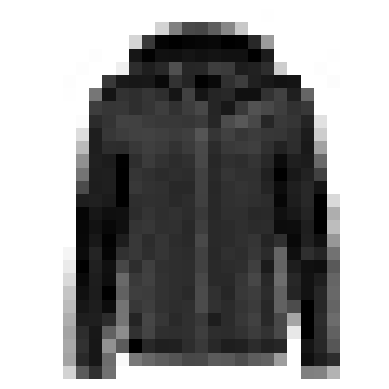

In [125]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [126]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [127]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [128]:
class_names[y_train[0]]

'Coat'

In [129]:
X_valid.shape

(5000, 28, 28)

In [130]:
X_test.shape

(10000, 28, 28)

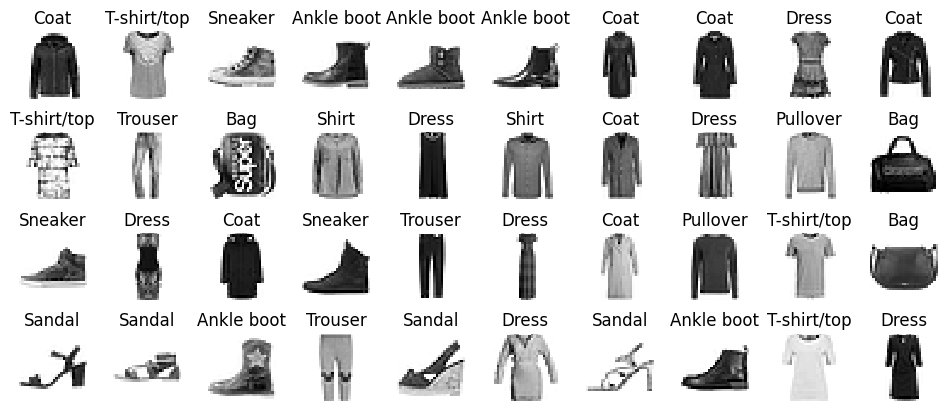

In [131]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [132]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [133]:
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

In [134]:
model.layers

In [135]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [136]:
model.layers[1].name

'dense_3'

In [137]:
#model.get_layer('dense_9').name

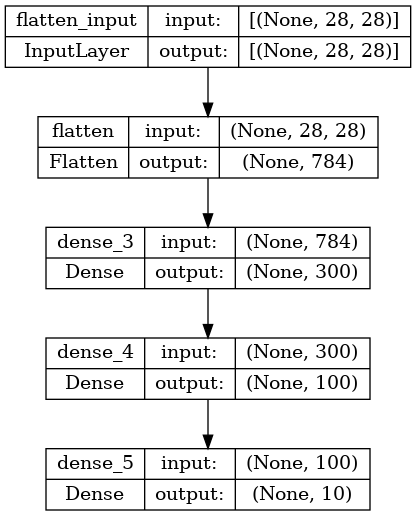

In [138]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [139]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [140]:
model.get_layer(hidden1.name) is hidden1

True

In [141]:
weights, biases = hidden1.get_weights()

In [142]:
weights

array([[ 0.05524851,  0.04045919,  0.02938863, ..., -0.00805077,
        -0.04845192, -0.04664949],
       [ 0.01773477, -0.04012411,  0.03095376, ..., -0.04381645,
         0.02016798, -0.04434142],
       [ 0.00015914, -0.05169815, -0.02363943, ...,  0.05009379,
        -0.06694152,  0.01803566],
       ...,
       [-0.06385058,  0.04071195,  0.0715113 , ...,  0.03184555,
        -0.04532202,  0.05260815],
       [-0.06385228,  0.00292581,  0.0681019 , ..., -0.06343115,
         0.04161583,  0.05797352],
       [-0.01943987, -0.05888409,  0.0335854 , ...,  0.07151946,
         0.01769663, -0.07406161]], dtype=float32)

In [143]:
weights.shape

(784, 300)

In [144]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [145]:
biases.shape

(300,)

In [146]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# This is equivalent to:
# model.compile(loss=keras.losses.sparse_categorical_crossentropy,
#               optimizer=keras.optimizers.SGD(),
#               metrics=[keras.metrics.sparse_categorical_accuracy])

In [147]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

2023-07-24 16:38:58.580615: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30
1719/1719 [==============================] - 27s 14ms/step - loss: 0.7068 - accuracy: 0.7688 - val_loss: 0.5062 - val_accuracy: 0.8294
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4841 - accuracy: 0.8308 - val_loss: 0.4312 - val_accuracy: 0.8540
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4390 - accuracy: 0.8455 - val_loss: 0.5207 - val_accuracy: 0.8016
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4134 - accuracy: 0.8557 - val_loss: 0.3907 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3955 - accuracy: 0.8617 - val_loss: 0.3768 - val_accuracy: 0.8654
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3776 - accuracy: 0.8662 - val_loss: 0.3689 - val_accuracy: 0.8738
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3655 - accuracy: 0.8709 - val_loss: 0.3642 - val_accurac

In [148]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [149]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [150]:
history.history

{'loss': [0.7067855000495911,
  0.4841494560241699,
  0.4390416443347931,
  0.4133899211883545,
  0.39551281929016113,
  0.37758418917655945,
  0.3654524087905884,
  0.35424670577049255,
  0.3440015912055969,
  0.3348608613014221,
  0.32665157318115234,
  0.31725233793258667,
  0.3107408881187439,
  0.3042283058166504,
  0.2971082031726837,
  0.2920956015586853,
  0.2861970365047455,
  0.27987903356552124,
  0.2750684320926666,
  0.2699550986289978,
  0.2645362615585327,
  0.2596323490142822,
  0.25501373410224915,
  0.25069883465766907,
  0.24622812867164612,
  0.2419726848602295,
  0.2382436841726303,
  0.23469892144203186,
  0.22970925271511078,
  0.22644850611686707],
 'accuracy': [0.7687636613845825,
  0.8308363556861877,
  0.8454909324645996,
  0.8557454347610474,
  0.8617272973060608,
  0.8662182092666626,
  0.8708909153938293,
  0.8740181922912598,
  0.8777636289596558,
  0.8809636235237122,
  0.8841999769210815,
  0.886054515838623,
  0.8882181644439697,
  0.8903090953826904,


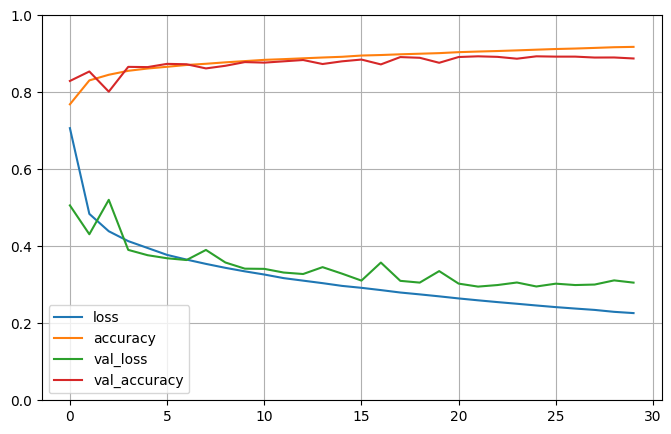

In [151]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [152]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3432 - accuracy: 0.8789


[0.3432244062423706, 0.8788999915122986]

In [153]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 64ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [154]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 21ms/step


array([9, 2, 1])

In [155]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [156]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

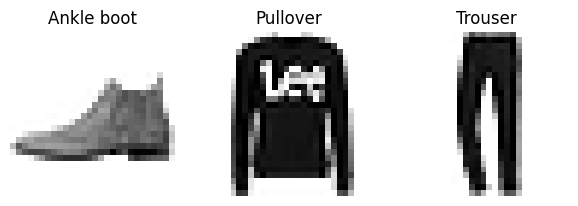

In [157]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Regression MLP

In [158]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [159]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [160]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

In [161]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [162]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [163]:
np.random.seed(42)
tf.random.set_seed(42)

In [164]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [165]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 2.9294 - val_loss: 5.0488
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8242 - val_loss: 1.7264
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6255 - val_loss: 0.6946
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5693 - val_loss: 0.5485
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5375 - val_loss: 0.5066
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5134 - val_loss: 0.4860
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4940 - val_loss: 0.4731
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4785 - val_loss: 0.4533
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4657 - val_loss: 0.4408
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4553 - val_loss: 0.4304

In [166]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4016


In [167]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 191ms/step


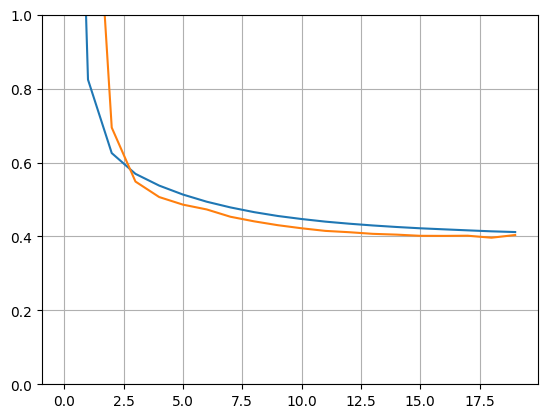

In [168]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [169]:
y_pred

array([[0.6832417],
       [1.640023 ],
       [3.2643352]], dtype=float32)

# Functional API

In [170]:
np.random.seed(42)
tf.random.set_seed(42)

In [171]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [172]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_9 (Dense)             (None, 30)                   930       ['dense_8[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_9[0][0]']         

In [173]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [174]:
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 1.6250 - val_loss: 2.7658
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6791 - val_loss: 0.6936
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6024 - val_loss: 0.6358
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5721 - val_loss: 0.5974
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5438 - val_loss: 0.5576
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5211 - val_loss: 0.4794
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5061 - val_loss: 0.4585
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4918 - val_loss: 0.5374
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4781 - val_loss: 0.4374
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4680 - val_loss: 0.4272

In [175]:
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 245ms/step


***you want to send different subsets of input features through the wide or deep paths***

In [176]:
np.random.seed(42)
tf.random.set_seed(42)

In [177]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [178]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [179]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [180]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 4s 10ms/step - loss: 2.5426 - val_loss: 1.3735
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.9237 - val_loss: 0.9247
Epoch 3/20
363/363 [==============================] - 3s 8ms/step - loss: 0.7689 - val_loss: 0.7913
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7024 - val_loss: 0.6785
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6560 - val_loss: 0.6255
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6177 - val_loss: 0.5883
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5853 - val_loss: 0.5588
Epoch 8/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5573 - val_loss: 0.5165
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5335 - val_loss: 0.4938
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5138 - val_loss: 0.476

In [181]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 1s 532ms/step


***Adding an auxiliary output for regularization:***

In [182]:
np.random.seed(42)
tf.random.set_seed(42)

In [183]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [184]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [185]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 2.6248 - main_output_loss: 2.4796 - aux_output_loss: 3.9322 - val_loss: 2.2581 - val_main_output_loss: 2.0609 - val_aux_output_loss: 4.0333
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.9548 - main_output_loss: 0.7732 - aux_output_loss: 2.5898 - val_loss: 1.2598 - val_main_output_loss: 0.9684 - val_aux_output_loss: 3.8818
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.7528 - main_output_loss: 0.6189 - aux_output_loss: 1.9581 - val_loss: 0.9529 - val_main_output_loss: 0.6319 - val_aux_output_loss: 3.8417
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6796 - main_output_loss: 0.5726 - aux_output_loss: 1.6428 - val_loss: 0.8833 - val_main_output_loss: 0.5608 - val_aux_output_loss: 3.7860
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6399 - main_output_loss: 0.5469 - aux_output_loss: 1.4773 - val_loss

In [186]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 331ms/step


# The subclassing API

In [187]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [188]:
model = WideAndDeepModel(30, activation="relu")

In [189]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10, validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Epoch 1/10
363/363 [==============================] - 11s 6ms/step - loss: 2.6640 - output_1_loss: 2.3009 - output_2_loss: 5.9320 - val_loss: 2.0322 - val_output_1_loss: 1.6799 - val_output_2_loss: 5.2031
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 1.1000 - output_1_loss: 0.8505 - output_2_loss: 3.3457 - val_loss: 1.1215 - val_output_1_loss: 0.9550 - val_output_2_loss: 2.6198
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.8342 - output_1_loss: 0.6850 - output_2_loss: 2.1770 - val_loss: 0.7794 - val_output_1_loss: 0.6688 - val_output_2_loss: 1.7751
Epoch 4/10
363/363 [==============================] - 3s 10ms/step - loss: 0.7204 - output_1_loss: 0.6161 - output_2_loss: 1.6597 - val_loss: 0.6854 - val_output_1_loss: 0.5966 - val_output_2_loss: 1.4848
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6595 - output_1_loss: 0.5761 - output_2_loss: 1.4095 - val_loss: 0.6333 - val_output_1_loss: 0.5481 - val_

In [190]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 238ms/step


# Saving and Restoring

In [191]:
np.random.seed(42)
tf.random.set_seed(42)

In [192]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [193]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 5s 9ms/step - loss: 1.7180 - val_loss: 0.7700
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7126 - val_loss: 0.7364
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6343 - val_loss: 0.6968
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5931 - val_loss: 0.5860
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5621 - val_loss: 0.5316
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5368 - val_loss: 0.5072
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5166 - val_loss: 0.4895
Epoch 8/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4999 - val_loss: 0.4654
Epoch 9/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4855 - val_loss: 0.4513
Epoch 10/10
162/162 [==============================] - 1s 3ms/step - loss: 0.4538


In [194]:
model.save("my_keras_model.h5")

/home/kazi/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [195]:
model = keras.models.load_model("my_keras_model.h5")

In [196]:
model.predict(X_new)

1/1 [==============================] - 0s 79ms/step


array([[0.6107763],
       [1.5756285],
       [3.0876694]], dtype=float32)

In [197]:
model.save_weights("my_keras_weights.ckpt")

In [198]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [199]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [200]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
]) 

In [201]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [202]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [203]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 2.4452 - val_loss: 2.6105
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7794 - val_loss: 0.6628
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6042 - val_loss: 0.5520
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5654 - val_loss: 0.5323
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5383 - val_loss: 0.5358
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5157 - val_loss: 0.4937
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4983 - val_loss: 0.4769
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4836 - val_loss: 0.4794
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4712 - val_loss: 0.4822
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4608 - val_loss: 0.4680

In [204]:
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4438


In [205]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [206]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4522 - val_loss: 0.4633
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4444 - val_loss: 0.5023
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4376 - val_loss: 0.4885
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4309 - val_loss: 0.4908
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4258 - val_loss: 0.4632
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4204 - val_loss: 0.4963
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4160 - val_loss: 0.5010
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4119 - val_loss: 0.4201
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4079 - val_loss: 0.4843
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4044 - val_lo

In [207]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3576


In [208]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [209]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])


358/363 [============================>.] - ETA: 0s - loss: 0.3602
val/train: 1.10
363/363 [==============================] - 1s 3ms/step - loss: 0.3606 - val_loss: 0.3950


# TensorBoard

In [210]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [211]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2023_07_24-16_53_51'

In [212]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [213]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [214]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 1.9158 - val_loss: 2.7004
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7438 - val_loss: 0.6334
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6429 - val_loss: 0.5837
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6033 - val_loss: 0.6051
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5730 - val_loss: 0.5497
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5485 - val_loss: 0.5225
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5286 - val_loss: 0.5217
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5118 - val_loss: 0.5236
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4972 - val_loss: 0.4630
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4849 - val_loss: 0.5010

# Hyperparameter Tuning

In [215]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [216]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [239]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [240]:
import sklearn
print(sklearn.__version__)

1.2.0


In [2]:
import tensorflow as tf
from tensorflow import keras
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

NameError: name 'build_model' is not defined